In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_train=pd.read_csv('mnist_train.csv')

In [ ]:
df_train.isna().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [ ]:
x_train=df_train.drop('label',axis=1)
y_train=df_train['label']

In [ ]:
df_test=pd.read_csv('mnist_test.csv')
x_test=df_test.drop('label',axis=1)
y_test=df_test['label']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
rf_test_pred=rf.predict(x_test)
rf_test_accuracy=accuracy_score(rf_test_pred,y_test)
print("Random Forest accuracy:",rf_test_accuracy)

Random Forest accuracy: 0.9696


In [ ]:
from sklearn import svm
svm=svm.SVC(kernel='rbf')
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)
svm_acc=accuracy_score(svm_pred,y_test)
print("SVM Accuracy:",svm_acc)

SVM Accuracy: 0.9792


In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=accuracy_score(lr_pred,y_test)
print("Logistic Regression Accuracy:",lr_acc)

Logistic Regression Accuracy: 0.9248


/home/u197750/.local/lib/python3.9/site-packages/daal4py/sklearn/linear_model/logistic_path.py:574: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_test_pred = knn.predict(x_test)
knn_test_accuracy = accuracy_score(knn_test_pred, y_test)
print("K-Nearest Neighbors Test Accuracy:", knn_test_accuracy)


K-Nearest Neighbors Test Accuracy: 0.9688


In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)
naive_bayes_test_pred = naive_bayes.predict(x_test)
naive_bayes_test_accuracy = accuracy_score(naive_bayes_test_pred, y_test)
print("Naive Bayes Test Accuracy:", naive_bayes_test_accuracy)


Naive Bayes Test Accuracy: 0.5558


In [ ]:
import xgboost as xgb
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(x_train, y_train)
xgb_test_pred = xgb_classifier.predict(x_test)
xgb_test_accuracy = accuracy_score(xgb_test_pred, y_test)
print("XGBoost Test Accuracy:", xgb_test_accuracy)


XGBoost Test Accuracy: 0.9795


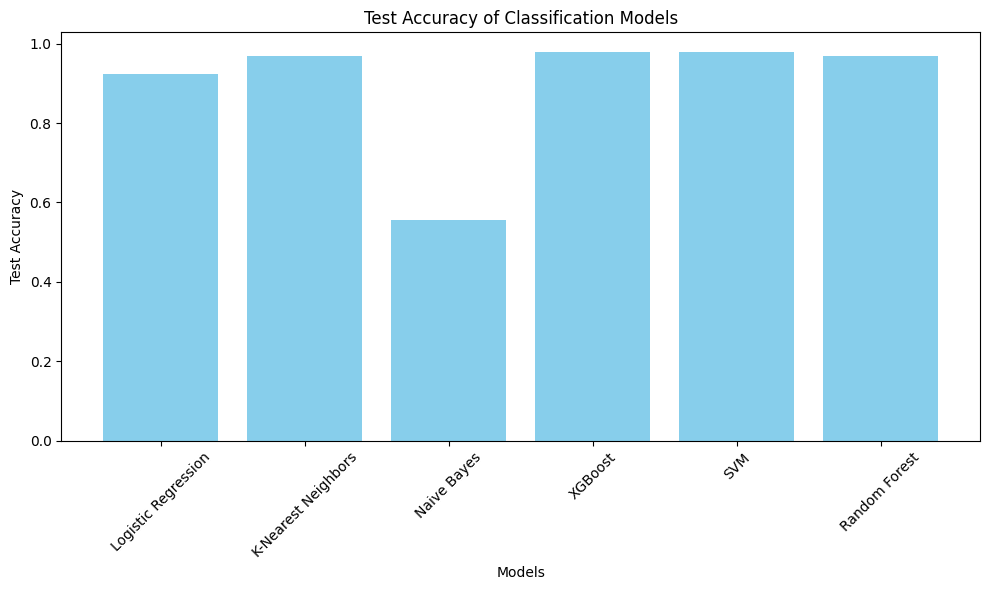

In [ ]:
import matplotlib.pyplot as plt

# Test accuracies for each model
test_accuracies = [
    lr_acc,
    knn_test_accuracy,
    naive_bayes_test_accuracy,
    xgb_test_accuracy,
    svm_acc,
    rf_test_accuracy
]

# Model names for labeling the x-axis
model_names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Naive Bayes",
    "XGBoost",
    "SVM",  # Adding SVM
    "Random Forest"
]
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='skyblue')
plt.title('Test Accuracy of Classification Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


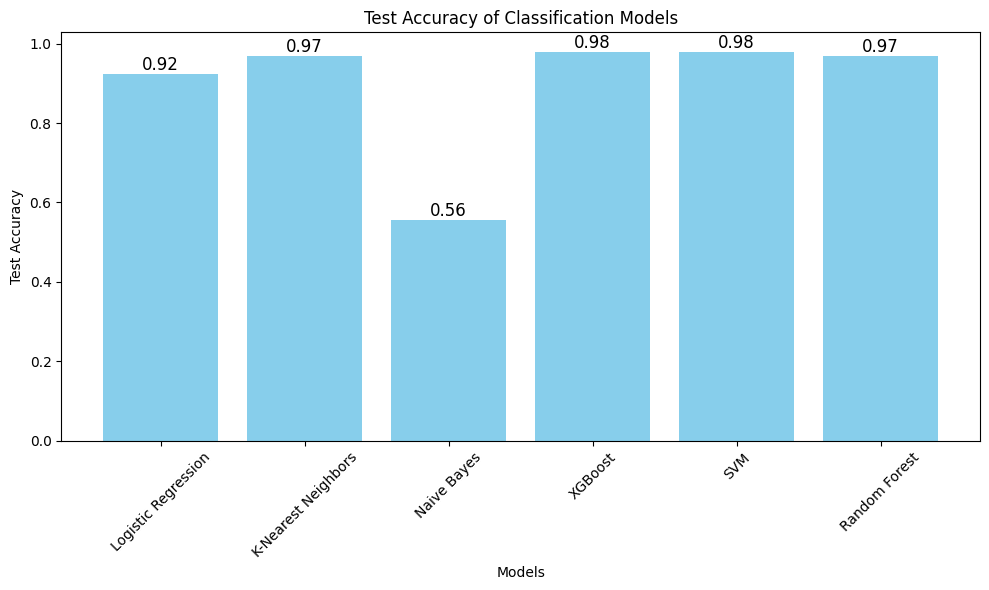

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from tabulate import tabulate

# Model names and test accuracies
model_names = [
    "Logistic Regression",
    "K-Nearest Neighbors",
    "Naive Bayes",
    "XGBoost",
    "SVM",
    "Random Forest"
]

test_accuracies = [
    lr_acc,
    knn_test_accuracy,
    naive_bayes_test_accuracy,
    xgb_test_accuracy,
    svm_acc,
    rf_test_accuracy
]
df = pd.DataFrame({'Model': model_names, 'Test Accuracy': test_accuracies})

styled_df = df.style.set_table_styles(
    [{'selector': '',
      'props': [('border', '2px solid black')]}])
print(styled_df)

# Plot the test accuracies
plt.figure(figsize=(10, 6))
plt.bar(model_names, test_accuracies, color='skyblue')
plt.title('Test Accuracy of Classification Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)
plt.tight_layout()
for i, v in enumerate(test_accuracies):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=12)

# Show the plot
plt.show()


In [ ]:
styled_df

,Model,Test Accuracy
0,Logistic Regression,0.924800
1,K-Nearest Neighbors,0.968800
2,Naive Bayes,0.555800
3,XGBoost,0.979500
4,SVM,0.979200
5,Random Forest,0.969600
